In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.constants import c
from astropy.coordinates import Galactic

import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt

import projections
import mycmap

#data from https://lambda.gsfc.nasa.gov/product/foreground/fg_hi4pi_info.cfm

In [2]:
hdu = fits.open('map_data/NHI_HPX.fits')
cat = hdu[1].data

In [3]:
cat.dtype.names

('HPXINDEX', 'RA2000', 'DEC2000', 'GLON', 'GLAT', 'NHI')

In [5]:
npix = cat.shape[0]
h1_map = np.zeros(npix)
h1_map[cat['HPXINDEX']] = cat['NHI']

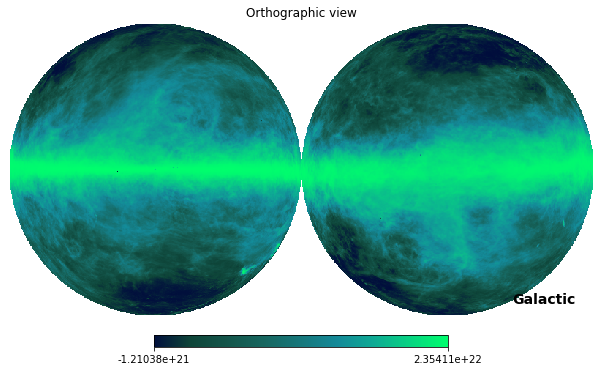

In [6]:
hp.orthview(h1_map,cmap=mycmap.h1,norm='hist',coord=["G"])

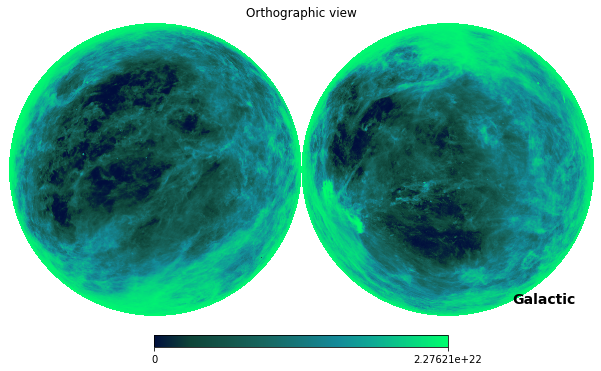

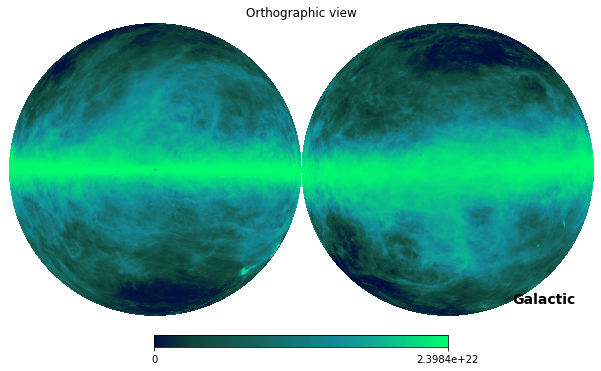

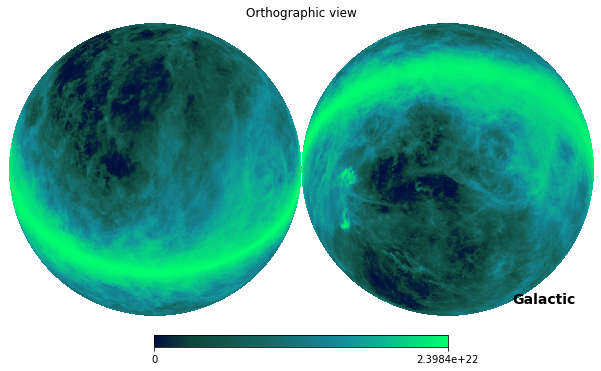

In [7]:
projections.generate_projection_set(h1_map,
                                    size=4096,
                                    dname='HI4PI_galactic_4096',
                                    cmap=mycmap.h1,
                                    norm='hist',
                                    coord=["G"])